In [2]:
import cv2
import numpy as np
from sklearn.utils import shuffle
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from utils.utils import load_dataset, download_dataset, create_cnn_model, get_callbacks, get_preds, show_train_loss_accuracy, show_metrics, INPUT_SHAPE, OUTPUT_CLASSES
%matplotlib inline
warnings.filterwarnings('ignore')

2025-09-27 18:21:16.944113: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-27 18:21:17.641801: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/cenzi/Área de trabalho/Aulas/tcc/venv/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/home/cenzi/Área de trabalho/Aulas/tcc/venv/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exa

In [5]:
DATA_PATH = "./augmented_dataset"
TEST_PATH = "./data"
TRAIN_PATH = os.path.join(DATA_PATH, "train")
TEST_PATH = os.path.join(TEST_PATH, "test")

In [6]:
X_train, y_train, LABEL_MAP = load_dataset(TRAIN_PATH)
X_test, y_test, _ = load_dataset(TEST_PATH)

X_train.shape, y_train.shape, LABEL_MAP

((101010, 48, 48, 3),
 (101010,),
 {'angry': 0,
  'disgust': 1,
  'fear': 2,
  'happy': 3,
  'neutral': 4,
  'sad': 5,
  'surprise': 6})

In [7]:
from tensorflow.keras.applications import VGG19, DenseNet201, ResNet50V2

OUTPUT_CLASSES = 7
INPUT_SHAPE = (48, 48, 3)


resnet50v2 = create_cnn_model(
    ResNet50V2(
    include_top=False,
    weights="imagenet",
    input_shape=INPUT_SHAPE,
    pooling=None,
    classes=OUTPUT_CLASSES,
    classifier_activation="softmax"
), OUTPUT_CLASSES, flatten=True)

denseNet201 = create_cnn_model(DenseNet201(
    include_top=False,
    weights="imagenet",
    input_shape=INPUT_SHAPE,
    pooling=None,
    classes=OUTPUT_CLASSES,
    classifier_activation="softmax"
), OUTPUT_CLASSES, flatten=True)

vgg19 = create_cnn_model(VGG19(
    include_top=False,
    weights="imagenet",
    input_shape=INPUT_SHAPE,
    pooling=None,
    classes=OUTPUT_CLASSES,
    classifier_activation="softmax"
), OUTPUT_CLASSES, flatten=True)

models = {
    "ResNet50v2": resnet50v2,
    "DenseNet201": denseNet201,
    "VGG19": vgg19,
    
}

2025-09-27 18:22:52.053675: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [8]:
from tensorflow.keras.utils import to_categorical

BATCH_SIZE = 32
EPOCHS = 60
histories = {}

# Normaliza
X_train_resized = X_train.astype("float32") / 255.0
X_test_resized = X_test.astype("float32") / 255.0

# One-hot
y_train_cat = to_categorical(y_train, num_classes=OUTPUT_CLASSES)
y_test_cat = to_categorical(y_test, num_classes=OUTPUT_CLASSES)

for model_name, model in models.items():
    print(f"STRAT TRAINING MODEL {model_name}...")
    histories[model_name] = model.fit(X_train_resized, y_train_cat,
                                     validation_split=0.2,
                                     epochs=EPOCHS,
                                     batch_size=BATCH_SIZE,
                                     callbacks=get_callbacks(model_name))
    print(f"FINISH TRAINING MODEL {model_name}!")
    print("---------------------------------------------------------------")

STRAT TRAINING MODEL ResNet50v2...


2025-09-27 18:23:40.671685: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 2234179584 exceeds 10% of free system memory.


Epoch 1/60
2525/2526 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.2066 - loss: 2.4933

2025-09-27 18:26:40.166640: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 558544896 exceeds 10% of free system memory.


2526/2526 ━━━━━━━━━━━━━━━━━━━━ 216s 82ms/step - accuracy: 0.2285 - loss: 2.2898 - val_accuracy: 0.3167 - val_loss: 1.7713 - learning_rate: 1.0000e-04
Epoch 2/60
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 198s 79ms/step - accuracy: 0.2665 - loss: 1.9497 - val_accuracy: 0.3373 - val_loss: 1.7208 - learning_rate: 1.0000e-04
Epoch 3/60
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 202s 80ms/step - accuracy: 0.2992 - loss: 1.8203 - val_accuracy: 0.3498 - val_loss: 1.6901 - learning_rate: 1.0000e-04
Epoch 4/60
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 209s 83ms/step - accuracy: 0.3229 - loss: 1.7484 - val_accuracy: 0.3579 - val_loss: 1.6722 - learning_rate: 1.0000e-04
Epoch 5/60
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 212s 84ms/step - accuracy: 0.3398 - loss: 1.7034 - val_accuracy: 0.3620 - val_loss: 1.6602 - learning_rate: 1.0000e-04
Epoch 6/60
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 212s 84ms/step - accuracy: 0.3552 - loss: 1.6696 - val_accuracy: 0.3698 - val_loss: 1.6459 - learning_rate: 1.0000e-04
Epoch 7/60
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 212

2025-09-27 19:27:07.627020: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 2234179584 exceeds 10% of free system memory.


Epoch 1/60
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.2235 - loss: 2.4464

2025-09-27 19:32:36.766164: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 558544896 exceeds 10% of free system memory.


2526/2526 ━━━━━━━━━━━━━━━━━━━━ 400s 148ms/step - accuracy: 0.2537 - loss: 2.2281 - val_accuracy: 0.3541 - val_loss: 1.6898 - learning_rate: 1.0000e-04
Epoch 2/60
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 337s 133ms/step - accuracy: 0.3049 - loss: 1.8690 - val_accuracy: 0.3728 - val_loss: 1.6264 - learning_rate: 1.0000e-04
Epoch 3/60
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 318s 126ms/step - accuracy: 0.3363 - loss: 1.7403 - val_accuracy: 0.3838 - val_loss: 1.5983 - learning_rate: 1.0000e-04
Epoch 4/60
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 319s 126ms/step - accuracy: 0.3569 - loss: 1.6696 - val_accuracy: 0.3944 - val_loss: 1.5797 - learning_rate: 1.0000e-04
Epoch 5/60
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 318s 126ms/step - accuracy: 0.3733 - loss: 1.6276 - val_accuracy: 0.4002 - val_loss: 1.5649 - learning_rate: 1.0000e-04
Epoch 6/60
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 316s 125ms/step - accuracy: 0.3853 - loss: 1.5969 - val_accuracy: 0.4076 - val_loss: 1.5525 - learning_rate: 1.0000e-04
Epoch 7/60
2526/2526 ━━━━━━━━━━━━━━━━━━

2025-09-27 21:45:44.298534: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 2234179584 exceeds 10% of free system memory.


Epoch 1/60
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 535s 210ms/step - accuracy: 0.2288 - loss: 2.2620 - val_accuracy: 0.3213 - val_loss: 1.7580 - learning_rate: 1.0000e-04
Epoch 2/60
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 524s 207ms/step - accuracy: 0.2687 - loss: 1.9392 - val_accuracy: 0.3390 - val_loss: 1.7050 - learning_rate: 1.0000e-04
Epoch 3/60
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 524s 207ms/step - accuracy: 0.2930 - loss: 1.8223 - val_accuracy: 0.3461 - val_loss: 1.6834 - learning_rate: 1.0000e-04
Epoch 4/60
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 525s 208ms/step - accuracy: 0.3132 - loss: 1.7627 - val_accuracy: 0.3526 - val_loss: 1.6697 - learning_rate: 1.0000e-04
Epoch 5/60
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 525s 208ms/step - accuracy: 0.3274 - loss: 1.7272 - val_accuracy: 0.3612 - val_loss: 1.6556 - learning_rate: 1.0000e-04
Epoch 6/60
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 526s 208ms/step - accuracy: 0.3380 - loss: 1.7025 - val_accuracy: 0.3675 - val_loss: 1.6450 - learning_rate: 1.0000e-04
Epoch 7/60
2526/2526 ━━━━━━━

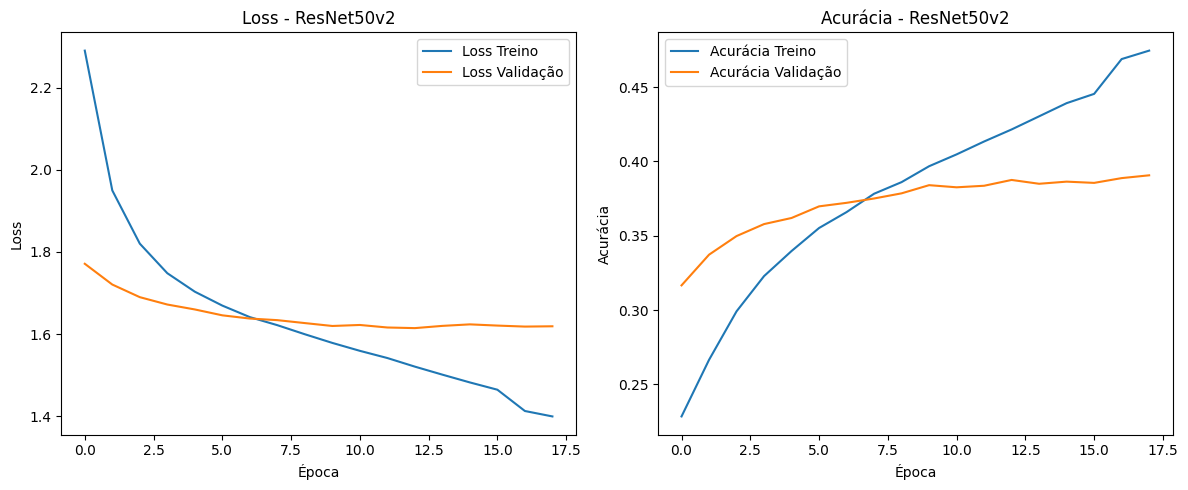

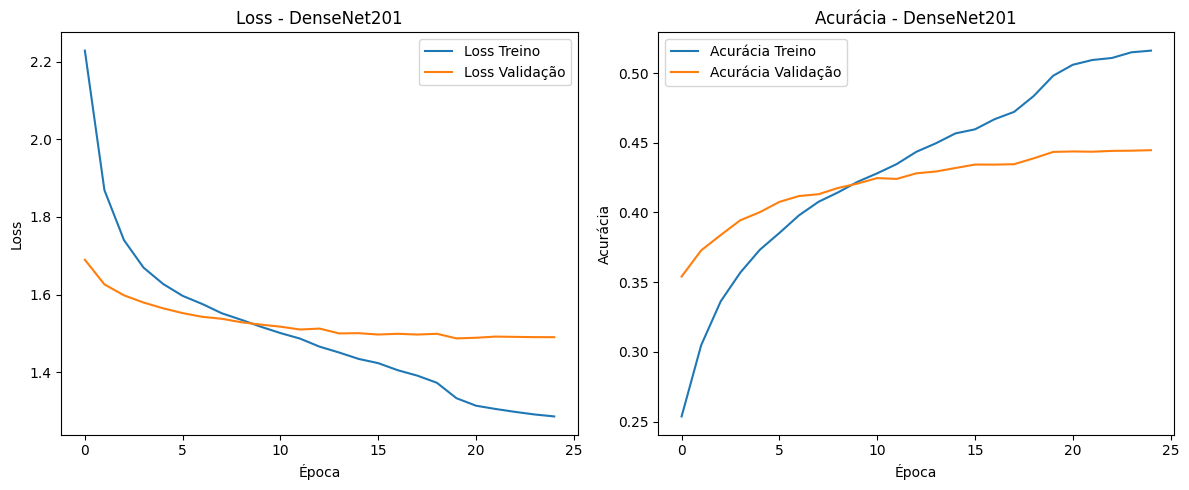

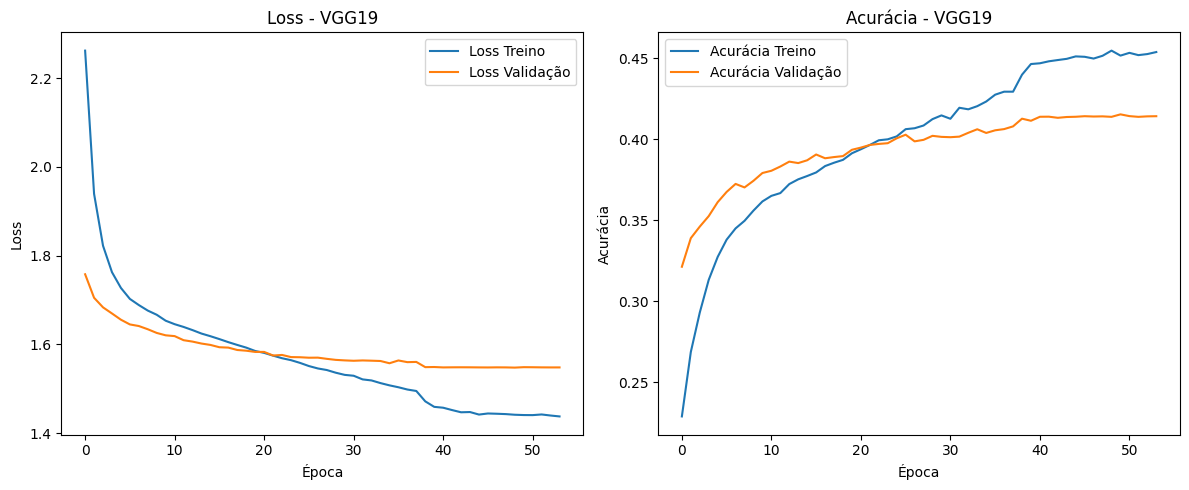

In [9]:
for model_name, history in histories.items():
    show_train_loss_accuracy(history, model_name)

In [10]:
y_preds = {}
for model_name, model in models.items():
    y_preds[model_name] = get_preds(X_train_resized, model)

3157/3157 ━━━━━━━━━━━━━━━━━━━━ 196s 61ms/step
3157/3157 ━━━━━━━━━━━━━━━━━━━━ 301s 93ms/step
3157/3157 ━━━━━━━━━━━━━━━━━━━━ 506s 160ms/step


Métricas do modelo: ResNet50v2
Accuracy Score:   0.4683
Precision Score:  0.459
Recall Score:     0.4683
F1 Score:         0.4537

Classification Report:

              precision    recall  f1-score   support

           0       0.44      0.29      0.35     14430
           1       0.50      0.76      0.60     14430
           2       0.42      0.25      0.31     14430
           3       0.49      0.55      0.52     14430
           4       0.41      0.44      0.43     14430
           5       0.42      0.36      0.39     14430
           6       0.54      0.62      0.58     14430

    accuracy                           0.47    101010
   macro avg       0.46      0.47      0.45    101010
weighted avg       0.46      0.47      0.45    101010


Acurácia por classe:
- angry: 29.11%
- disgust: 76.36%
- fear: 25.07%
- happy: 55.07%
- neutral: 43.98%
- sad: 36.06%
- surprise: 62.13%


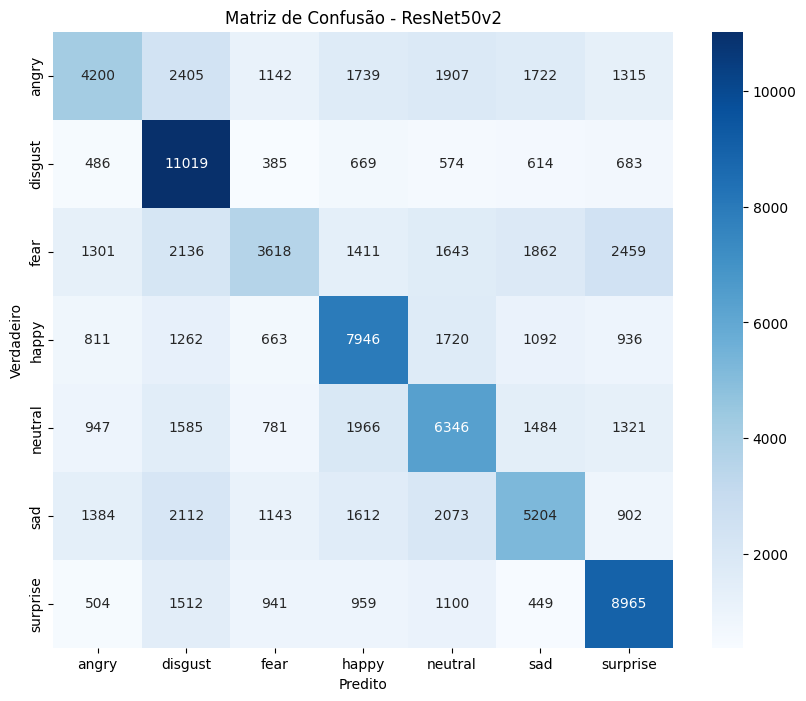

Métricas do modelo: DenseNet201
Accuracy Score:   0.5486
Precision Score:  0.5367
Recall Score:     0.5486
F1 Score:         0.5375

Classification Report:

              precision    recall  f1-score   support

           0       0.47      0.44      0.46     14430
           1       0.69      0.87      0.77     14430
           2       0.49      0.33      0.40     14430
           3       0.53      0.64      0.58     14430
           4       0.49      0.46      0.48     14430
           5       0.46      0.39      0.42     14430
           6       0.62      0.70      0.66     14430

    accuracy                           0.55    101010
   macro avg       0.54      0.55      0.54    101010
weighted avg       0.54      0.55      0.54    101010


Acurácia por classe:
- angry: 44.42%
- disgust: 86.97%
- fear: 33.34%
- happy: 63.78%
- neutral: 46.31%
- sad: 39.15%
- surprise: 70.05%


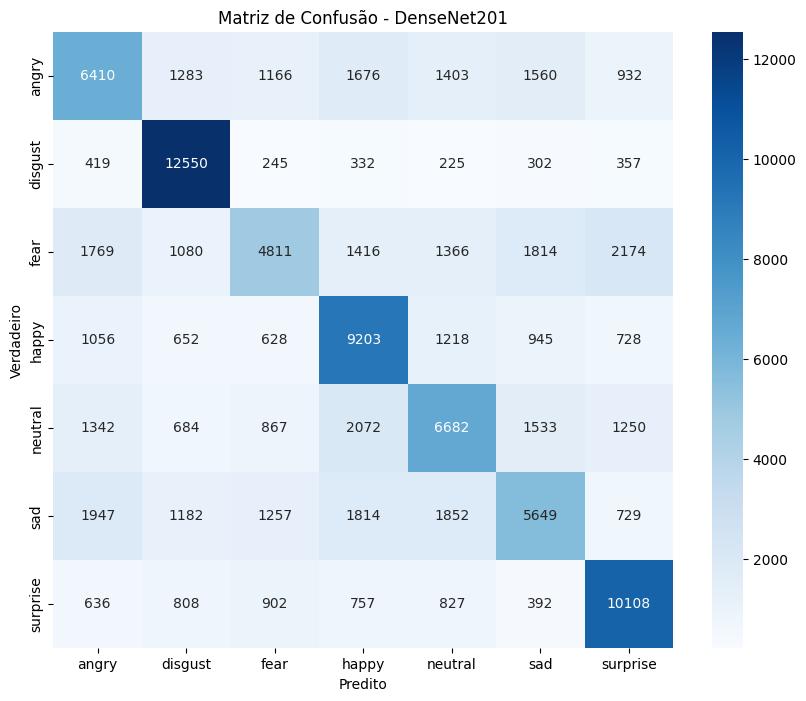

Métricas do modelo: VGG19
Accuracy Score:   0.493
Precision Score:  0.4847
Recall Score:     0.493
F1 Score:         0.479

Classification Report:

              precision    recall  f1-score   support

           0       0.46      0.34      0.39     14430
           1       0.56      0.84      0.67     14430
           2       0.48      0.27      0.35     14430
           3       0.48      0.53      0.51     14430
           4       0.42      0.42      0.42     14430
           5       0.41      0.39      0.40     14430
           6       0.59      0.65      0.62     14430

    accuracy                           0.49    101010
   macro avg       0.48      0.49      0.48    101010
weighted avg       0.48      0.49      0.48    101010


Acurácia por classe:
- angry: 34.19%
- disgust: 84.10%
- fear: 27.09%
- happy: 53.33%
- neutral: 42.33%
- sad: 39.44%
- surprise: 64.59%


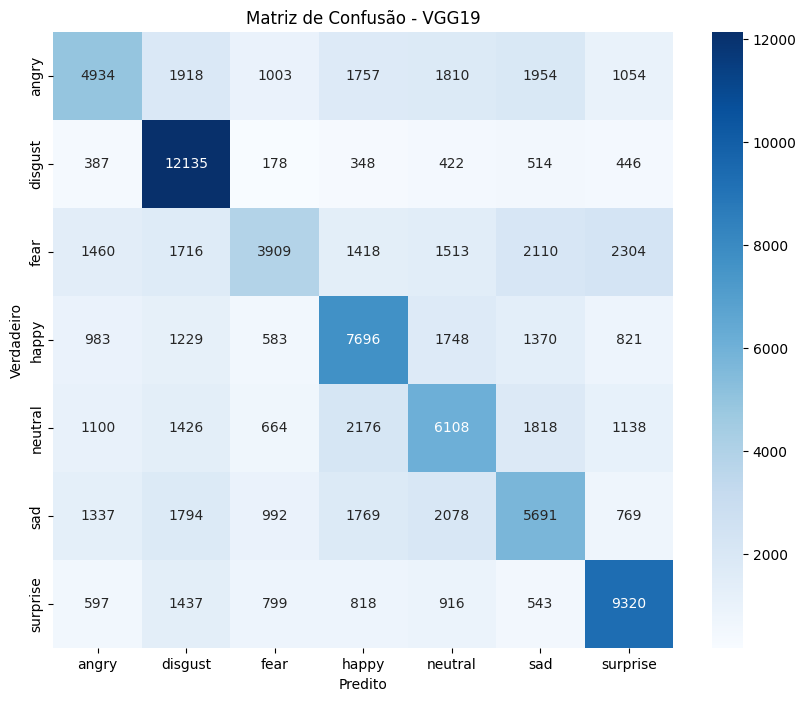

In [11]:
metrics = {}
for model_name, preds in y_preds.items():
    metrics[model_name] = show_metrics(y_train, preds, model_name, "confusion_matrix_completa_flatten", LABEL_MAP)

In [12]:
y_preds_teste = {}
for model_name, model in models.items():
    y_preds_teste[model_name] = get_preds(X_test_resized, model)

225/225 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 36s 158ms/step


Métricas do modelo: ResNet50v2
Accuracy Score:   0.4241
Precision Score:  0.3762
Recall Score:     0.4033
F1 Score:         0.3739

Classification Report:

              precision    recall  f1-score   support

           0       0.33      0.26      0.29       958
           1       0.11      0.39      0.17       111
           2       0.33      0.23      0.27      1024
           3       0.55      0.63      0.59      1774
           4       0.37      0.44      0.40      1233
           5       0.41      0.30      0.34      1247
           6       0.53      0.57      0.55       831

    accuracy                           0.42      7178
   macro avg       0.38      0.40      0.37      7178
weighted avg       0.43      0.42      0.42      7178


Acurácia por classe:
- angry: 25.57%
- disgust: 38.74%
- fear: 23.24%
- happy: 63.47%
- neutral: 44.36%
- sad: 29.51%
- surprise: 57.40%


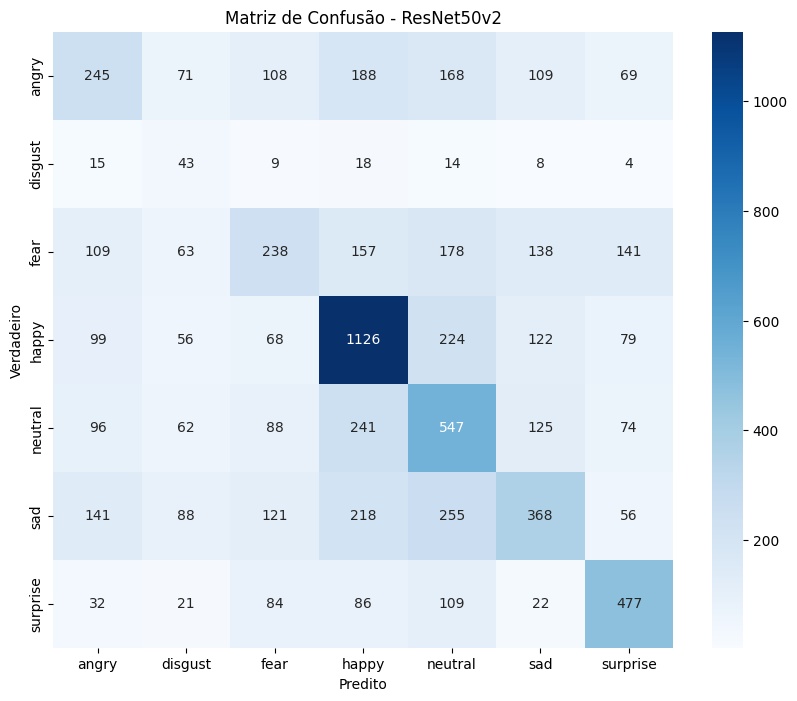

Métricas do modelo: DenseNet201
Accuracy Score:   0.4546
Precision Score:  0.4189
Recall Score:     0.4365
F1 Score:         0.4221

Classification Report:

              precision    recall  f1-score   support

           0       0.34      0.34      0.34       958
           1       0.27      0.42      0.33       111
           2       0.39      0.27      0.32      1024
           3       0.54      0.67      0.60      1774
           4       0.41      0.43      0.42      1233
           5       0.39      0.31      0.35      1247
           6       0.60      0.61      0.61       831

    accuracy                           0.45      7178
   macro avg       0.42      0.44      0.42      7178
weighted avg       0.45      0.45      0.45      7178


Acurácia por classe:
- angry: 34.13%
- disgust: 42.34%
- fear: 27.15%
- happy: 67.08%
- neutral: 42.66%
- sad: 30.95%
- surprise: 61.25%


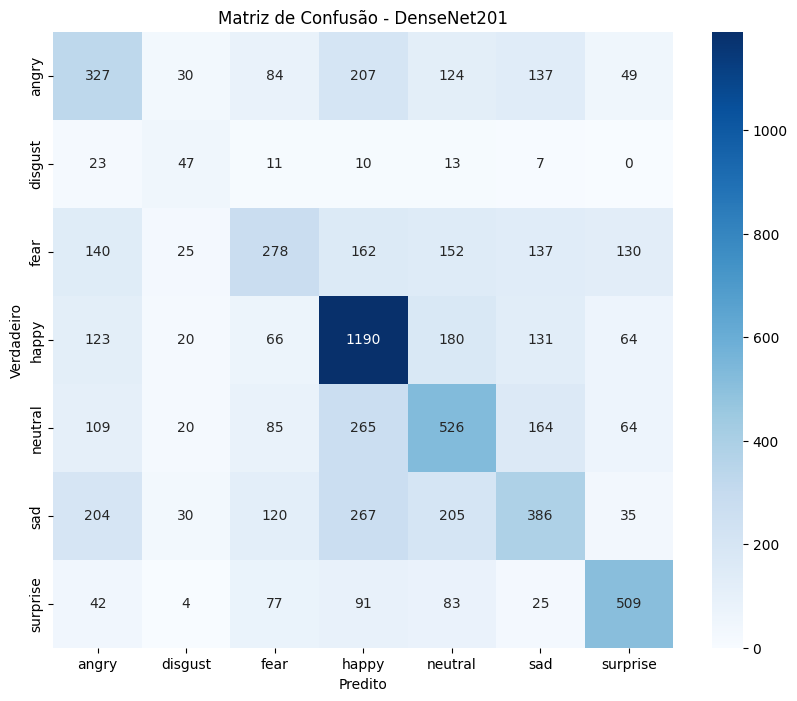

Métricas do modelo: VGG19
Accuracy Score:   0.4295
Precision Score:  0.3947
Recall Score:     0.4143
F1 Score:         0.3958

Classification Report:

              precision    recall  f1-score   support

           0       0.35      0.30      0.32       958
           1       0.23      0.41      0.29       111
           2       0.37      0.22      0.28      1024
           3       0.50      0.63      0.56      1774
           4       0.37      0.42      0.39      1233
           5       0.38      0.31      0.34      1247
           6       0.57      0.61      0.59       831

    accuracy                           0.43      7178
   macro avg       0.39      0.41      0.40      7178
weighted avg       0.42      0.43      0.42      7178


Acurácia por classe:
- angry: 29.96%
- disgust: 41.44%
- fear: 22.07%
- happy: 63.08%
- neutral: 41.52%
- sad: 31.03%
- surprise: 60.89%


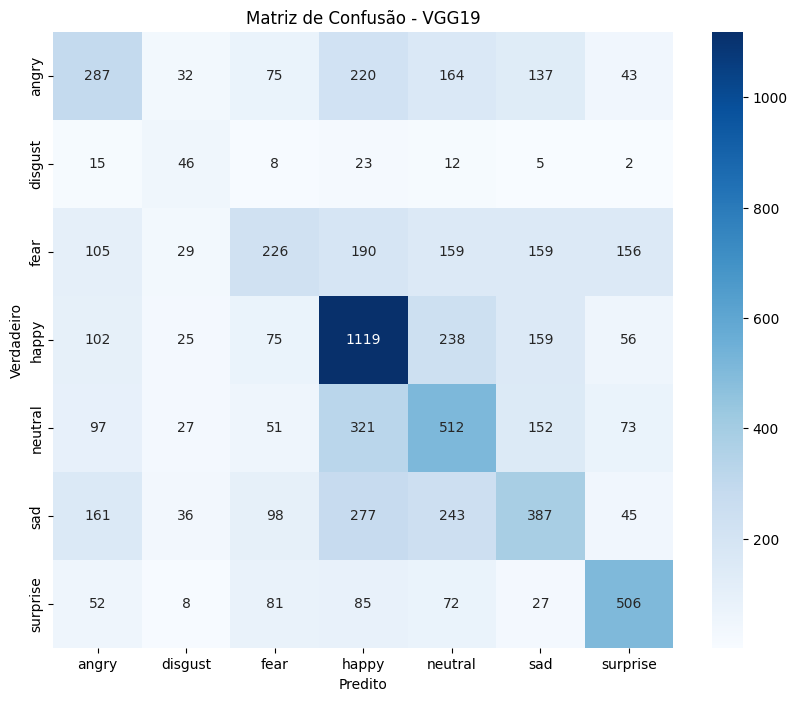

In [13]:
metrics_teste = {}
for model_name, preds in y_preds_teste.items():
    metrics_teste[model_name] = show_metrics(y_test, preds, model_name,"confusion_matrix_completa_flatten", LABEL_MAP, is_test=True)